# EJERCICIO DE REGRESION LOGISTICA 

## PREDICCIÓN DE ENFERMEDADES CARDÍACAS

In [14]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [6]:
datos = pd.read_csv('..\Jorge\Datos/Rlogística.csv')

In [7]:
datos.head(5)

,SEXO,EDAD,EDUCACION,FUMADOR ACTUAL,CIGARRILLOS POR DIA,MED PA,ACCICBP,HIPERTENSO PREV,DIABETES,NIVEL COLESTEROL TOTAL,PRESION ARTERIAL SIS,PRESION ARTERIAL DIAS,IMC,FRECUENCIA CARDIACA,NIVEL GLUCOSA,REC10A
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Variables de interes:

 - Edad: Edad del paciente
 - REC10A: Riesgo de enfermedad coronaria coronaria a 10 años (binario: “1”, significa “Sí”, “0” significa “No”)

   # Tabla con los valores de interes

In [40]:
datos[['EDAD','REC10A']].head(5)

,EDAD,REC10A
0,39,0
1,46,0
2,48,0
3,61,1
4,46,0


<Axes: xlabel='EDAD', ylabel='REC10A'>

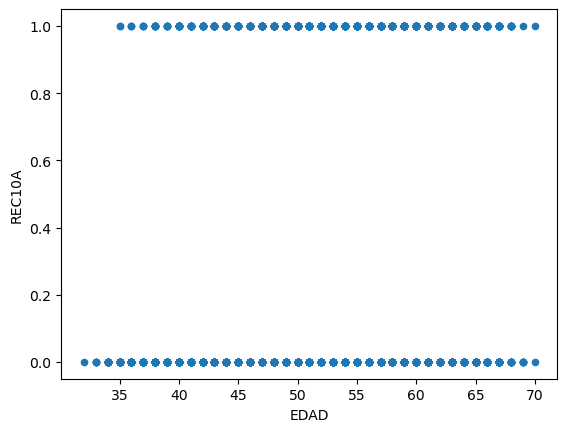

In [34]:
datos[['EDAD','REC10A']].plot.scatter(x='EDAD',y='REC10A')

In [35]:
from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_datos = np.array(datos['EDAD']).reshape((-1, 1))
Y_datos = np.array(datos['REC10A'])

# creando modelo
model = LogisticRegression()
model.fit(X_datos, Y_datos)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): [-5.55794639]
pendiente (w): [[0.07459601]]


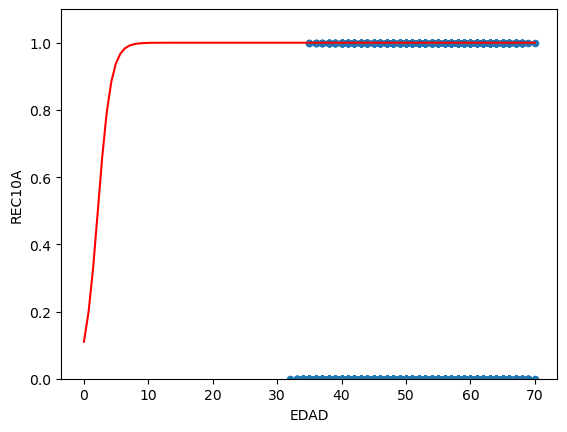

In [42]:
# Variables:
w = 0.97
b = -2.09

# puntos de la recta
x = np.linspace(0,datos['EDAD'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
datos.plot.scatter(x='EDAD',y='REC10A')
plt.plot(x, y, '-r')
plt.ylim(0,datos['REC10A'].max()*1.1)
# plt.grid()
plt.show()

### Analisis de los datos obtenidos

 - La probabilidad de sufrir una enfermedad cardiaca aumenta proporcionalmente con la edad, pero podemos apreciar que específicamente desde los 5 años ya se tiene un riego alto
 - Las enfermedades cardiacas son diagnosticadas normalmente a partir de los 34 años
 - según el estudio las personas con riesgo de sufrir una enfermedad cardiaca no viven más de los 73 años
